# [__Projeto II__] Análise de Dados - Magic: The Gathering

O jogo _Magic: The Gathering_, criado por [Richard Garfield](https://pt.wikipedia.org/wiki/Richard_Garfield) e publicado pela _Wizards of the Coast_ à partir de 1993, foi o primeiro _TCG_ (Jogo de Cartas Colecionáveis) produzido, e continua sendo lançado até os dias de hoje (2024, publicação desse notebook).
Com uma base enorme de jogadores, e mais de 90 mil cartas publicadas, o jogo contém uma gama quase infinita de possibilidades não só para seus jogadores, como também para ser utilizado como objeto de análise de dados.

É importante ressaltar que esse projeto não visa esgotar as possibilidades de análise, mas apenas demonstrar algumas visualizações. Além disso, preparar o ambiente para ser iterado, melhorado e reutilizado em outros projetos no decorrer do curso.

## Importando os dados

Para manter esse ambiente mais limpo, e agilizar alguns códigos repetitivos, algumas funções foram definidas no módulo `datasets`, cujo código pode ser encontrado neste projeto.

Caso se interesse em executar esse projeto, siga as instruções contidas no [README](README.md) do projeto.

Utilizaremos a base de dados de cartas de Magic The Gathering, disponibilizada através da API do site [Scryfall](https://scryfall.com/). A base pode ser encontrada no link: [Scryfall Default Cards Dataset](https://data.scryfall.io/default-cards/default-cards-20240216220537.json)

In [1]:
import pandas as pd
import datasets.get_dataset as gd

import seaborn as sns
import matplotlib.pyplot as plt

## Visualizando os dados brutos

Primeiramente, para demonstrar o ponto de partida, vamos apenas obter o `dataset` à partir do JSON contido no diretório `.\datasets`.

_Nota:_ É importante ressaltar que o dataset em questão tem cerca de 400MB, com mais de 92 mil registros. Executar alguns dos trechos de código desse _notebook_ pode ser um tanto custoso, dependendo do computador em questão.

In [2]:
file_path = gd.get_file_path()

mtg_dataset = pd.read_json(file_path)

print(mtg_dataset.shape)
(mtg_dataset.head())

(92217, 85)


,object,id,oracle_id,multiverse_ids,mtgo_id,mtgo_foil_id,tcgplayer_id,cardmarket_id,name,lang,...,tcgplayer_etched_id,flavor_name,attraction_lights,color_indicator,printed_type_line,printed_text,variation_of,life_modifier,hand_modifier,content_warning
0,card,0000579f-7b35-4ed3-b44c-db2a538066fe,44623693-51d6-49ad-8cd7-140505caf02f,[109722],25527.0,25528.0,14240.0,13850.0,Fury Sliver,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,card,00006596-1166-4a79-8443-ca9f82e6db4e,8ae3562f-28b7-4462-96ed-be0cf7052ccc,[189637],34586.0,34587.0,33347.0,21851.0,Kor Outfitter,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,card,0000a54c-a511-4925-92dc-01b937f9afad,dc4e2134-f0c2-49aa-9ea3-ebf83af1445c,[],NaN,NaN,98659.0,NaN,Spirit,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,card,0000cd57-91fe-411f-b798-646e965eec37,9f0d82ae-38bf-45d8-8cda-982b6ead1d72,[435231],65170.0,65171.0,145764.0,301766.0,Siren Lookout,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,card,00012bd8-ed68-4978-a22d-f450c8a6e048,5aa12aff-db3c-4be5-822b-3afdf536b33e,[1278],NaN,NaN,1623.0,5664.0,Web,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
mtg_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92217 entries, 0 to 92216
Data columns (total 85 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   object               92217 non-null  object        
 1   id                   92217 non-null  object        
 2   oracle_id            92174 non-null  object        
 3   multiverse_ids       92217 non-null  object        
 4   mtgo_id              45944 non-null  float64       
 5   mtgo_foil_id         24632 non-null  float64       
 6   tcgplayer_id         79110 non-null  float64       
 7   cardmarket_id        68881 non-null  float64       
 8   name                 92217 non-null  object        
 9   lang                 92217 non-null  object        
 10  released_at          92217 non-null  datetime64[ns]
 11  uri                  92217 non-null  object        
 12  scryfall_uri         92217 non-null  object        
 13  layout               92217 non-null 

In [4]:
mtg_dataset[['name', 'mana_cost', 'power', 'toughness', 'color_identity']].iloc[0]

name              Fury Sliver
mana_cost              {5}{R}
power                       3
toughness                   3
color_identity            [R]
Name: 0, dtype: object

## Lidando com dados tratados.
É possível ver que são diversos valores no dataset bruto. O que, como dito anteriormente, pode gerar um custo computacional de execução bem grande.

Por isso, para essa versão do projeto, aplicaremos alguns dos tratamentos que podem ser encontrados nas funções do arquivo [get_dataset.py](datasets\get_dataset.py). Todas as funções desse módulo foram escritas para esse projeto, e estão devidamente documentadas.

Em alguns casos, haverá redução do tamanho do conjunto de dados. Nesses casos, a redução será descrita.

No dataset inicial temos um conjunto de mais de 92 mil registros.

Usando algumas das funções que já aplicam tratamentos, temos:

In [6]:
# Reduzindo um pouco as colunas,
# e aplicando um tratamento simples nos valores que originalmente são listas.
mtg = gd.get_flattened_subset(concat_char=" | ")

(mtg.head())

,name,mana_cost,cmc,colors,color_identity,keywords,power,toughness,type_line,edhrec_rank,produced_mana,loyalty,life_modifier,hand_modifier
0,Fury Sliver,{5}{R},6.0,[R],R,,3,3,Creature — Sliver,6911.0,NaN,NaN,NaN,NaN
1,Kor Outfitter,{W}{W},2.0,[W],W,,2,2,Creature — Kor Soldier,16425.0,NaN,NaN,NaN,NaN
2,Spirit,,0.0,[W],W,Flying,1,1,Token Creature — Spirit,NaN,NaN,NaN,NaN,NaN
3,Siren Lookout,{2}{U},3.0,[U],U,Flying | Explore,1,2,Creature — Siren Pirate,14267.0,NaN,NaN,NaN,NaN
4,Web,{G},1.0,[G],G,Enchant,NaN,NaN,Enchantment — Aura,22123.0,NaN,NaN,NaN,NaN


In [7]:
mtg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92217 entries, 0 to 92216
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            92217 non-null  object 
 1   mana_cost       89327 non-null  object 
 2   cmc             92174 non-null  float64
 3   colors          89327 non-null  object 
 4   color_identity  92217 non-null  object 
 5   keywords        92217 non-null  object 
 6   power           43296 non-null  object 
 7   toughness       43296 non-null  object 
 8   type_line       92174 non-null  object 
 9   edhrec_rank     80961 non-null  float64
 10  produced_mana   13874 non-null  object 
 11  loyalty         1347 non-null   object 
 12  life_modifier   119 non-null    float64
 13  hand_modifier   119 non-null    float64
dtypes: float64(4), object(10)
memory usage: 10.6+ MB


## Começando com algumas perguntas simples de serem respondidas

>**_5 COLORS. 5 PLAY STYLES. ENDLESS POSSIBILITIES._**
>
>_Each of the five colors in Magic represent a different philosophy and a different playstyle. Choose your color(s) to decide which type of land you’ll be drawing resources (mana) from and what type of Magic you’ll wield._
>
>[Site Oficial MTG](https://magic.wizards.com/en/intro)

Em _Magic: The Gathering_, cada cor de carta representa uma forma de jogar, e demanda um tipo de recurso diferente. É possível montar baralhos que contenham cartas de apenas uma das cores, como até estratégias que envolvam as 5 cores em conjunto. Então...

__1__ - Quais as cores mais comuns no jogo?

Na representação de cores no magic, é comum se referir a cada cor por apenas uma letra. Sendo assim, temos:
- __B__: Black (_Preto_)
- __G__: Green (_Verde_)
- __R__: Red (_Vermelho_)
- __W__: White (_Branco_)
- __U__: Blue (_Azul_)

Além disso, existem também no jogo algumas cartas incolores.

In [8]:
mtg.value_counts('color_identity')

color_identity
G                    13264
W                    12923
B                    12921
R                    12644
U                    12477
                     12440
G | W                 1413
B | U                 1398
U | W                 1390
B | R                 1334
G | R                 1317
R | W                 1219
G | U                 1212
B | W                 1189
R | U                 1172
B | G                 1155
B | R | U              371
B | G | R | U | W      355
G | R | W              298
B | U | W              276
G | U | W              261
B | G | R              253
B | G | U              182
B | R | W              182
R | U | W              181
B | G | W              167
G | R | U              161
G | R | U | W           21
B | G | U | W           21
B | G | R | U            7
B | R | U | W            7
B | G | R | W            6
Name: count, dtype: int64

In [9]:
# Pelo visto, o valor que representa as cartas incolores é mostrado apenas como "". Vamos resolver isso.

mtg['color_identity'] = mtg['color_identity'].replace("", "Incolor")

mtg.value_counts('color_identity')

color_identity
G                    13264
W                    12923
B                    12921
R                    12644
U                    12477
Incolor              12440
G | W                 1413
B | U                 1398
U | W                 1390
B | R                 1334
G | R                 1317
R | W                 1219
G | U                 1212
B | W                 1189
R | U                 1172
B | G                 1155
B | R | U              371
B | G | R | U | W      355
G | R | W              298
B | U | W              276
G | U | W              261
B | G | R              253
B | R | W              182
B | G | U              182
R | U | W              181
B | G | W              167
G | R | U              161
B | G | U | W           21
G | R | U | W           21
B | G | R | U            7
B | R | U | W            7
B | G | R | W            6
Name: count, dtype: int64

In [10]:
mtg_colors = mtg.groupby('color_identity').size().reset_index(name='count')

total_count = mtg_colors['count'].sum()
mtg_colors['percentage'] = (mtg_colors['count'] / total_count) * 100

(mtg_colors.sort_values('count', ascending=False))

,color_identity,count,percentage
16,G,13264,14.383465
31,W,12923,14.013685
0,B,12921,14.011516
25,R,12644,13.711138
29,U,12477,13.530043
24,Incolor,12440,13.489921
23,G | W,1413,1.532255
13,B | U,1398,1.515989
30,U | W,1390,1.507314
9,B | R,1334,1.446588


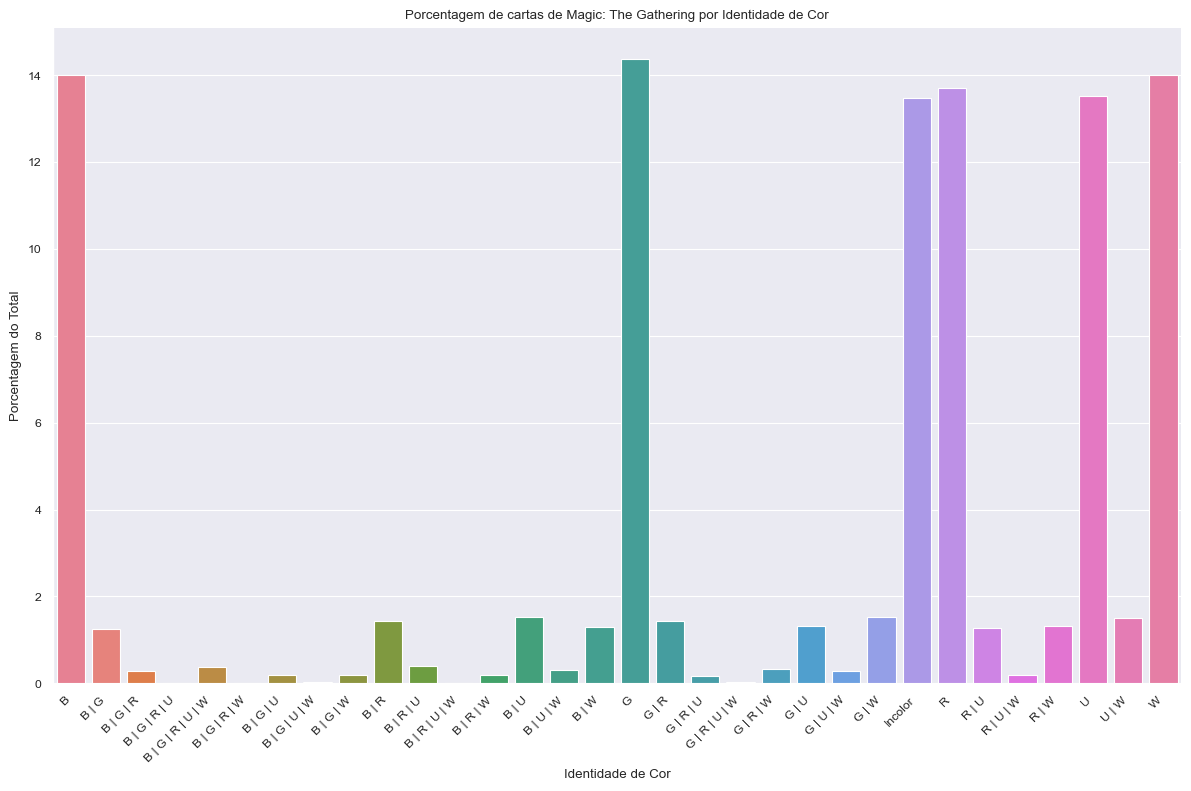

In [11]:
# Quais as cores de cartas mais comuns no jogo?
plt.figure(figsize= (12, 8))

sns.set_theme(style='darkgrid', context='paper')

bars = sns.barplot(
  data=mtg_colors,
  x='color_identity',
  y='percentage',
  hue='color_identity',
  legend=False,
)

sns.despine(bottom=True)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Identidade de Cor')
plt.ylabel("Porcentagem do Total")
plt.title("Porcentagem de cartas de Magic: The Gathering por Identidade de Cor")
plt.tight_layout()

plt.show()

### Agrupando Multicoloridas
As cartas multicoloridas ainda representam, individualmente (por combinação) uma parcela pequena, quando comparadas com as 5 cores (+ Incolores). Por isso, vamos agrupar esses valores em uma categoria "Multicor".
Aproveitando, vamos substituir os valores por `labels` mais amigáveis.

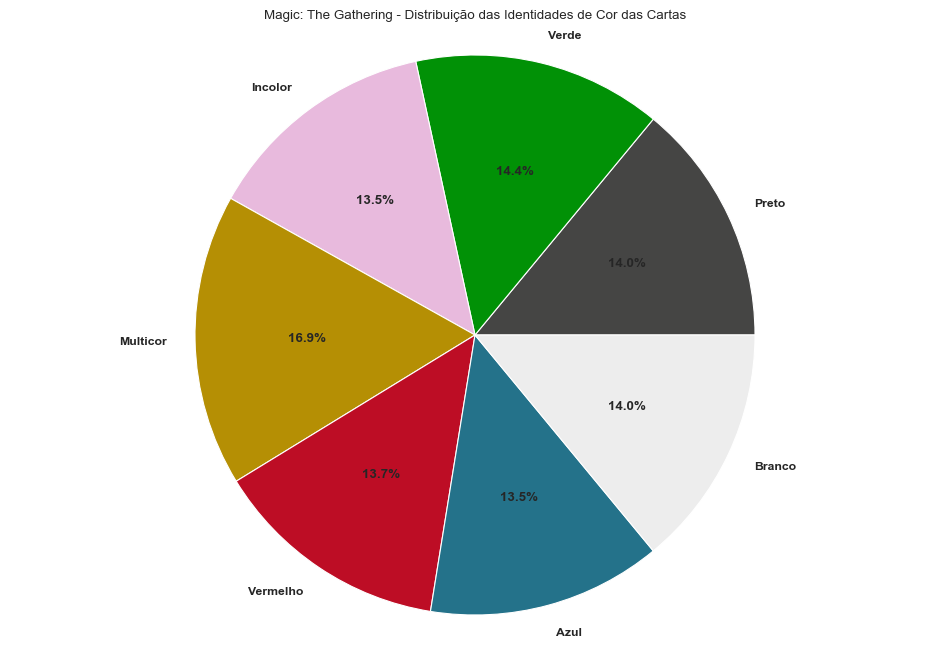

In [12]:
# Agrupando valores menores que 2%
limite = 2

mtg_colors['color_identity'] = mtg_colors.apply(lambda row: row['color_identity'] if row['percentage'] >= limite else 'Multicor', axis = 1)
mtg_multicolor = mtg_colors.groupby('color_identity').sum().reset_index()
mtg_multicolor['color_identity'] = mtg_multicolor['color_identity'].replace("G", "Verde")
mtg_multicolor['color_identity'] = mtg_multicolor['color_identity'].replace("B", "Preto")
mtg_multicolor['color_identity'] = mtg_multicolor['color_identity'].replace("W", "Branco")
mtg_multicolor['color_identity'] = mtg_multicolor['color_identity'].replace("U", "Azul")
mtg_multicolor['color_identity'] = mtg_multicolor['color_identity'].replace("R", "Vermelho")

colors = {
  "Verde": "#019106",
  "Preto": "#454544",
  "Branco": "#ededed",
  "Azul": "#24728a",
  "Vermelho": "#bd0d25",
  "Multicor": "#b58f04",
  "Incolor": "#e8badd",
}
plt.figure(figsize= (12, 8))

plt.pie(
  mtg_multicolor['percentage'],
  labels=mtg_multicolor['color_identity'],
  autopct='%1.1f%%',
  colors=[colors[label] for label in mtg_multicolor['color_identity']],
  textprops={'fontweight': 'bold'},
)
plt.axis('equal')
plt.title("Magic: The Gathering - Distribuição das Identidades de Cor das Cartas")

plt.show()

## Distribuições de CMC por Cor

Em _Magic: The Gathering_, o termo `CMC` representa o _Converted Mana Value_ (Valor de Mana Convertido), que pode ser ententido como a quantidade de recursos que serão necessários para utilizar aquela carta.

__2__ - Como se dá a distribuição de `CMC` em cada grupo de cor de mana?

In [14]:
mtg = gd.get_flattened_subset()
mtg['color_identity'] = mtg['color_identity'].replace("", "Incolor")

(mtg.head(20))

,name,mana_cost,cmc,colors,color_identity,keywords,power,toughness,type_line,edhrec_rank,produced_mana,loyalty,life_modifier,hand_modifier
0,Fury Sliver,{5}{R},6.0,[R],R,,3,3,Creature — Sliver,6911.0,NaN,NaN,NaN,NaN
1,Kor Outfitter,{W}{W},2.0,[W],W,,2,2,Creature — Kor Soldier,16425.0,NaN,NaN,NaN,NaN
2,Spirit,,0.0,[W],W,Flying,1,1,Token Creature — Spirit,NaN,NaN,NaN,NaN,NaN
3,Siren Lookout,{2}{U},3.0,[U],U,FlyingExplore,1,2,Creature — Siren Pirate,14267.0,NaN,NaN,NaN,NaN
4,Web,{G},1.0,[G],G,Enchant,NaN,NaN,Enchantment — Aura,22123.0,NaN,NaN,NaN,NaN
5,Surge of Brilliance,{1}{U},2.0,[U],U,ParadoxForetell,NaN,NaN,Instant,11203.0,NaN,NaN,NaN,NaN
6,Obyra's Attendants // Desperate Parry,{4}{U} // {1}{U},5.0,[U],U,Flying,3,4,Creature — Faerie Wizard // Instant — Adventure,16552.0,NaN,NaN,NaN,NaN
7,Venerable Knight,{W},1.0,[W],W,,2,1,Creature — Human Knight,14589.0,NaN,NaN,NaN,NaN
8,Wildcall,{X}{G}{G},2.0,[G],G,Manifest,NaN,NaN,Sorcery,18062.0,NaN,NaN,NaN,NaN
9,Mystic Skyfish,{2}{U},3.0,[U],U,,3,1,Creature — Fish,23172.0,NaN,NaN,NaN,NaN


In [15]:
# Aplicando o agrupamento de multicoloridas
limite = 2

mtg['color_identity'] = mtg.apply(lambda row: 'Multicor' if len(row['color_identity']) >= limite else row['color_identity'], axis = 1)

(mtg.head(20))

,name,mana_cost,cmc,colors,color_identity,keywords,power,toughness,type_line,edhrec_rank,produced_mana,loyalty,life_modifier,hand_modifier
0,Fury Sliver,{5}{R},6.0,[R],R,,3,3,Creature — Sliver,6911.0,NaN,NaN,NaN,NaN
1,Kor Outfitter,{W}{W},2.0,[W],W,,2,2,Creature — Kor Soldier,16425.0,NaN,NaN,NaN,NaN
2,Spirit,,0.0,[W],W,Flying,1,1,Token Creature — Spirit,NaN,NaN,NaN,NaN,NaN
3,Siren Lookout,{2}{U},3.0,[U],U,FlyingExplore,1,2,Creature — Siren Pirate,14267.0,NaN,NaN,NaN,NaN
4,Web,{G},1.0,[G],G,Enchant,NaN,NaN,Enchantment — Aura,22123.0,NaN,NaN,NaN,NaN
5,Surge of Brilliance,{1}{U},2.0,[U],U,ParadoxForetell,NaN,NaN,Instant,11203.0,NaN,NaN,NaN,NaN
6,Obyra's Attendants // Desperate Parry,{4}{U} // {1}{U},5.0,[U],U,Flying,3,4,Creature — Faerie Wizard // Instant — Adventure,16552.0,NaN,NaN,NaN,NaN
7,Venerable Knight,{W},1.0,[W],W,,2,1,Creature — Human Knight,14589.0,NaN,NaN,NaN,NaN
8,Wildcall,{X}{G}{G},2.0,[G],G,Manifest,NaN,NaN,Sorcery,18062.0,NaN,NaN,NaN,NaN
9,Mystic Skyfish,{2}{U},3.0,[U],U,,3,1,Creature — Fish,23172.0,NaN,NaN,NaN,NaN


In [16]:
mtg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92217 entries, 0 to 92216
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            92217 non-null  object 
 1   mana_cost       89327 non-null  object 
 2   cmc             92174 non-null  float64
 3   colors          89327 non-null  object 
 4   color_identity  92217 non-null  object 
 5   keywords        92217 non-null  object 
 6   power           43296 non-null  object 
 7   toughness       43296 non-null  object 
 8   type_line       92174 non-null  object 
 9   edhrec_rank     80961 non-null  float64
 10  produced_mana   13874 non-null  object 
 11  loyalty         1347 non-null   object 
 12  life_modifier   119 non-null    float64
 13  hand_modifier   119 non-null    float64
dtypes: float64(4), object(10)
memory usage: 10.6+ MB


In [17]:
# Nesse ponto, foi necessário reduzir o tamanho do dataset.
# Caso o gráfico abaixo não seja executado, tente reduzir o tamanho da próxima linha para 0.1 ou 0.25.
pct = 0.55
n_rows_percent = int(len(mtg) * pct)

mtg_reduced = mtg.sample(n=n_rows_percent, random_state=42)

(mtg_reduced.info())

<class 'pandas.core.frame.DataFrame'>
Index: 50719 entries, 25948 to 63053
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            50719 non-null  object 
 1   mana_cost       49094 non-null  object 
 2   cmc             50693 non-null  float64
 3   colors          49094 non-null  object 
 4   color_identity  50719 non-null  object 
 5   keywords        50719 non-null  object 
 6   power           23848 non-null  object 
 7   toughness       23848 non-null  object 
 8   type_line       50693 non-null  object 
 9   edhrec_rank     44515 non-null  float64
 10  produced_mana   7564 non-null   object 
 11  loyalty         748 non-null    object 
 12  life_modifier   62 non-null     float64
 13  hand_modifier   62 non-null     float64
dtypes: float64(4), object(10)
memory usage: 5.8+ MB


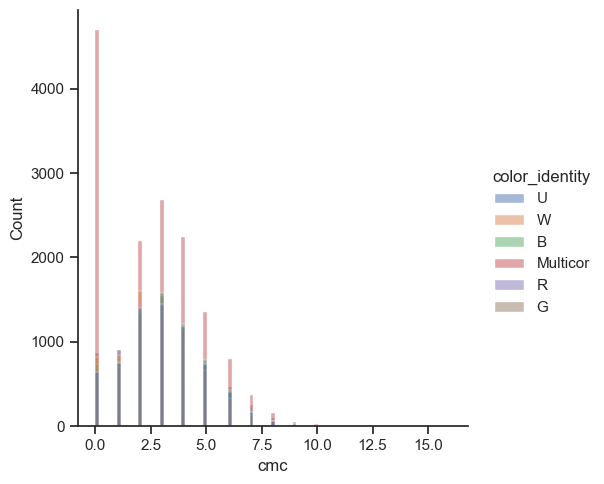

In [18]:
sns.set_theme(style='ticks')

sns.displot(data=mtg_reduced[['cmc', 'color_identity']], x='cmc', hue='color_identity')

plt.show()

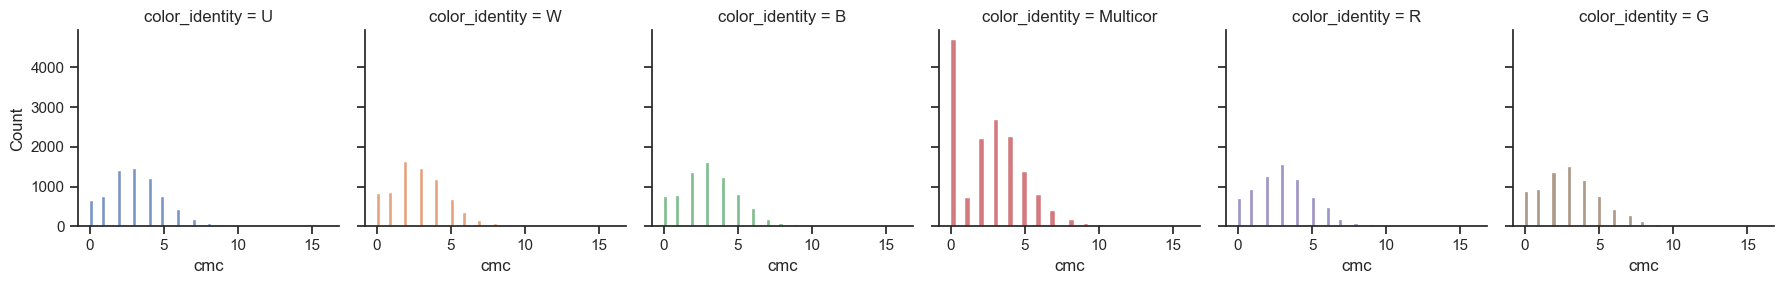

In [19]:
grid = sns.FacetGrid(mtg_reduced, col='color_identity', hue='color_identity')

grid.map(sns.histplot, 'cmc')

plt.show()

Possivelmente, o valor discrepante de contagem de CMC 0 na categoria `Multicor` se deu por conta do agrupamento.
Isso gera uma pergunta que pode ser respondida em outra oportunidade:

_Como se dá a distribuição de CMC em cada subgrupo de cartas multicoloridas?_

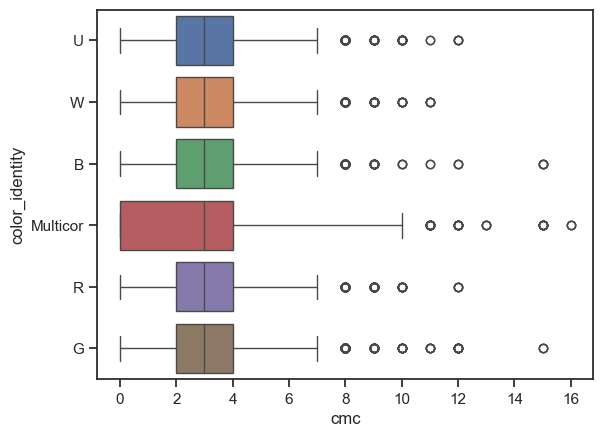

In [20]:
sns.boxplot(
  data=mtg_reduced,
  x='cmc',
  y='color_identity',
  hue='color_identity'
)

plt.show()

A visualização do `Boxplot` gera uma percepção interessante. A mediana dos dados, em qualquer uma das categrorias de cor, é sempre no `CMC` 3. E os demais quartis e limites também são bem próximos, exceto pelo grupo de multicoloridas.

Pode-se perceber também que as cores **Verde** (G) e **Preto** (B) possuem as cartas com os maiores `CMC` entre as cartas de uma única cor.

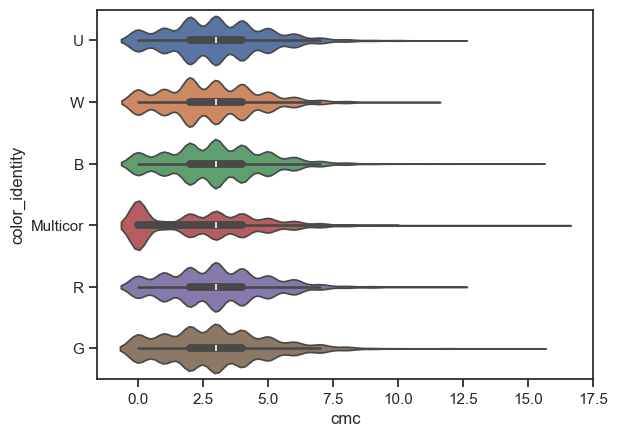

In [21]:
sns.violinplot(
  data=mtg_reduced,
  x='cmc',
  y='color_identity',
  hue='color_identity'
)

plt.show()

# Gráficos de Dispersão e Relação Entre 2+ variáveis numéricas
Para essas situações, a uma função foi definida para reduzir o dataset apenas à variáveis numéricas.
A função `cleaned_dataset` do módulo [get_dataset.py](datasets\get_dataset.py) aplica alguns tratamentos antes de retornar o dataset.

Nessa situação, o dataset fica reduzido a cerca de 39 mil registros.

In [23]:
mtg_numeric = gd.cleaned_dataset()

print(f"Dataset Shape: {mtg_numeric.shape}")
(mtg_numeric.head())

Dataset Shape: (39579, 14)


,name,mana_cost,cmc,colors,color_identity,keywords,power,toughness,type_line,edhrec_rank,produced_mana,loyalty,life_modifier,hand_modifier
0,Fury Sliver,{5}{R},6.0,[R],R,,3,3,Creature — Sliver,69110,NaN,NaN,NaN,NaN
1,Kor Outfitter,{W}{W},2.0,[W],W,,2,2,Creature — Kor Soldier,164250,NaN,NaN,NaN,NaN
3,Siren Lookout,{2}{U},3.0,[U],U,FlyingExplore,1,2,Creature — Siren Pirate,142670,NaN,NaN,NaN,NaN
6,Obyra's Attendants // Desperate Parry,{4}{U} // {1}{U},5.0,[U],U,Flying,3,4,Creature — Faerie Wizard // Instant — Adventure,165520,NaN,NaN,NaN,NaN
7,Venerable Knight,{W},1.0,[W],W,,2,1,Creature — Human Knight,145890,NaN,NaN,NaN,NaN


In [24]:
mtg_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39579 entries, 0 to 92215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            39579 non-null  object 
 1   mana_cost       39579 non-null  object 
 2   cmc             39579 non-null  float64
 3   colors          39579 non-null  object 
 4   color_identity  39579 non-null  object 
 5   keywords        39579 non-null  object 
 6   power           39579 non-null  int32  
 7   toughness       39579 non-null  int32  
 8   type_line       39579 non-null  object 
 9   edhrec_rank     39579 non-null  int32  
 10  produced_mana   1459 non-null   object 
 11  loyalty         0 non-null      object 
 12  life_modifier   0 non-null      float64
 13  hand_modifier   0 non-null      float64
dtypes: float64(3), int32(3), object(8)
memory usage: 4.1+ MB


In [25]:
mtg_numeric.describe()

,cmc,power,toughness,edhrec_rank,life_modifier,hand_modifier
count,39579.000000,39579.000000,39579.000000,39579.000000,0.0,0.0
mean,3.709113,2.712651,2.930797,117069.756942,NaN,NaN
std,1.748168,1.800170,1.798179,79189.831852,NaN,NaN
min,0.000000,0.000000,0.000000,330.000000,NaN,NaN
25%,2.000000,1.000000,2.000000,45500.000000,NaN,NaN
50%,3.000000,2.000000,3.000000,107150.000000,NaN,NaN
75%,5.000000,4.000000,4.000000,186340.000000,NaN,NaN
max,16.000000,18.000000,17.000000,265540.000000,NaN,NaN


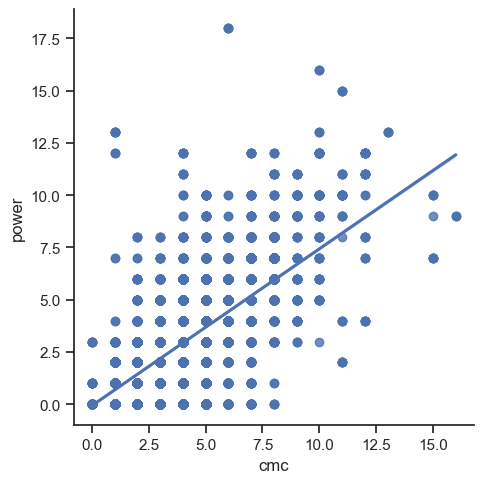

In [26]:
sns.lmplot(
  data=mtg_numeric,
  x='cmc',
  y='power'
)

plt.show()

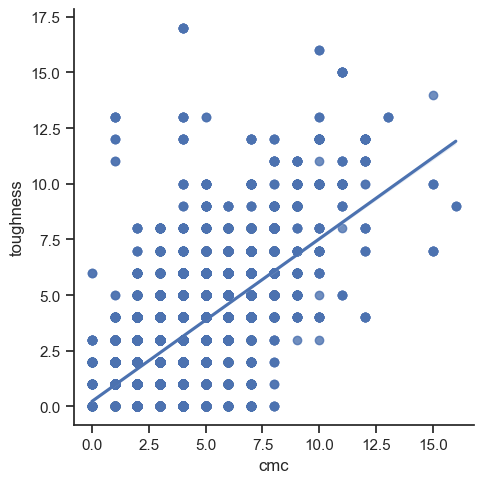

In [27]:
sns.lmplot(
  data=mtg_numeric,
  x='cmc',
  y='toughness'
)

plt.show()

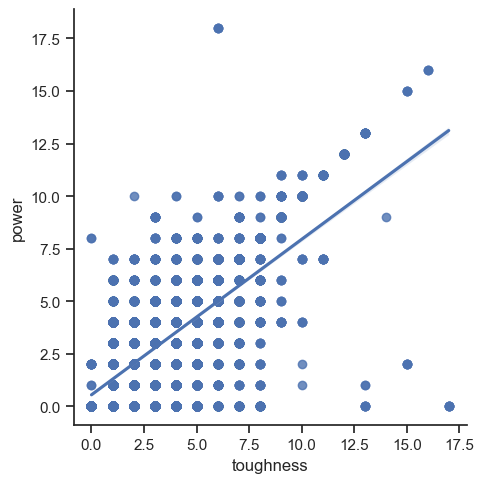

In [30]:
sns.lmplot(
  data=mtg_numeric,
  x='toughness',
  y='power',
)

plt.show()

In [31]:
mtg_corr = mtg_numeric[['cmc', 'power', 'toughness', 'edhrec_rank']].corr()

(mtg_corr)

,cmc,power,toughness,edhrec_rank
cmc,1.000000,0.728481,0.710202,-0.038164
power,0.728481,1.000000,0.738757,-0.054905
toughness,0.710202,0.738757,1.000000,-0.084840
edhrec_rank,-0.038164,-0.054905,-0.084840,1.000000


## Verificando a correlação entre as variáveis numéricas

Nesses casos, vale a definição de cada variável.
- __CMC__: Como já dito antes, representa o Custo Convertido de Mana de cada carta.
- __Power__: Representa o Poder, ou força _"ofensiva"_ de cada carta.
- __Toughness__: Representa a Resistência da carta.
- __Edhrec_Rank__: Rankeamento em um site focado em um formato específico de jogo.

Explicando um pouco melhor o `Edhrec_Rank`: O jogo de Magic pode ser jogado de diversas formas, possuindo diferentes [formatos](https://magic.wizards.com/en/formats) de construção de baralhos e de dinâmica de jogo. Entre eles, um dos mais populares é o conhecido hoje como _Commander_. Esse formato, no entanto, foi criado com o nome de _Elder Dragon Highlander_, o que dá o nome do site em questão, [EDHREC](https://edhrec.com/faq).

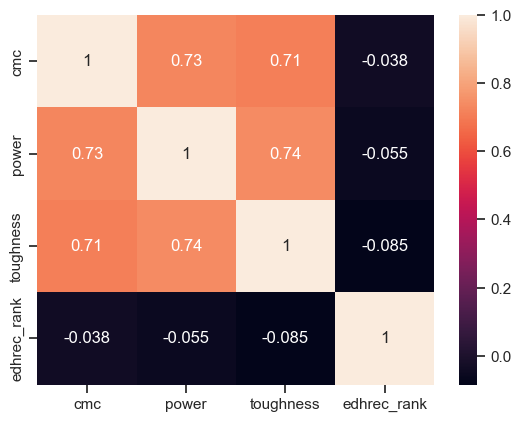

In [32]:
sns.heatmap(mtg_corr, annot=True)

plt.show()

Reobtendo o dataset para mais algumas verificações.

In [33]:
mtg = gd.cleaned_dataset()
mtg_numeric = mtg[['cmc', 'power', 'toughness', 'edhrec_rank', 'color_identity']]

mtg_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39579 entries, 0 to 92215
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cmc             39579 non-null  float64
 1   power           39579 non-null  int32  
 2   toughness       39579 non-null  int32  
 3   edhrec_rank     39579 non-null  int32  
 4   color_identity  39579 non-null  object 
dtypes: float64(1), int32(3), object(1)
memory usage: 1.4+ MB


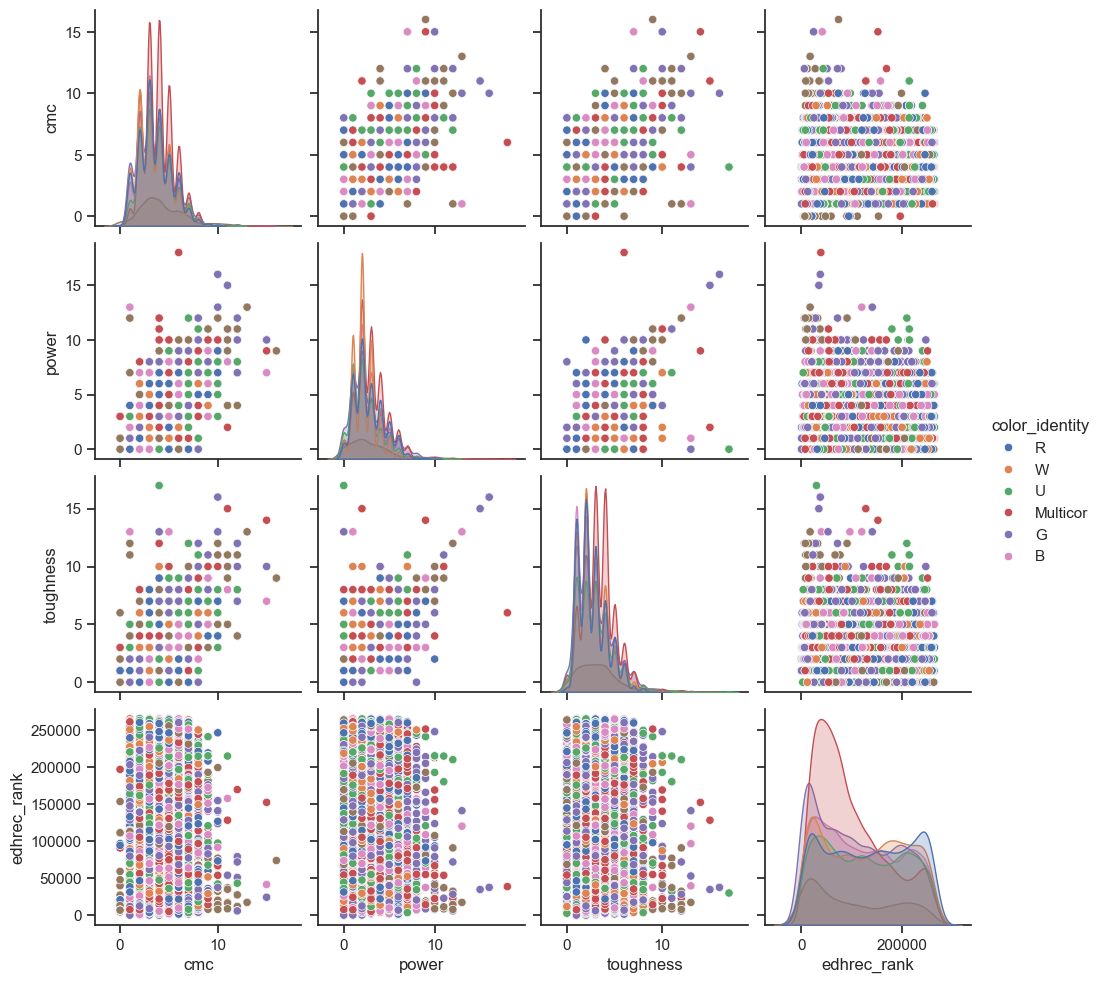

In [34]:
sns.pairplot(mtg_numeric, hue='color_identity')
plt.show()

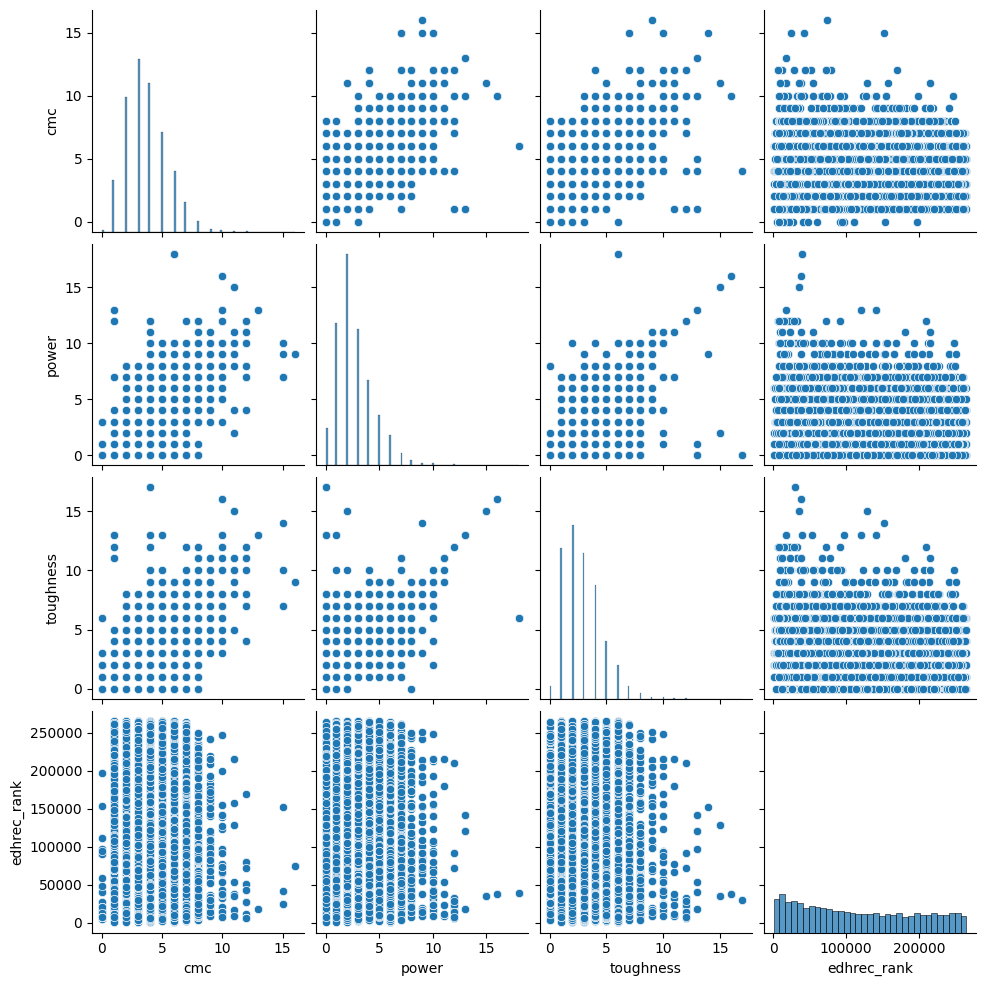

In [8]:
sns.pairplot(mtg_numeric)
plt.show()

Pelo visto, a quantidade de dados acabou poluindo demais os gráficos do tipo `pairplot`.

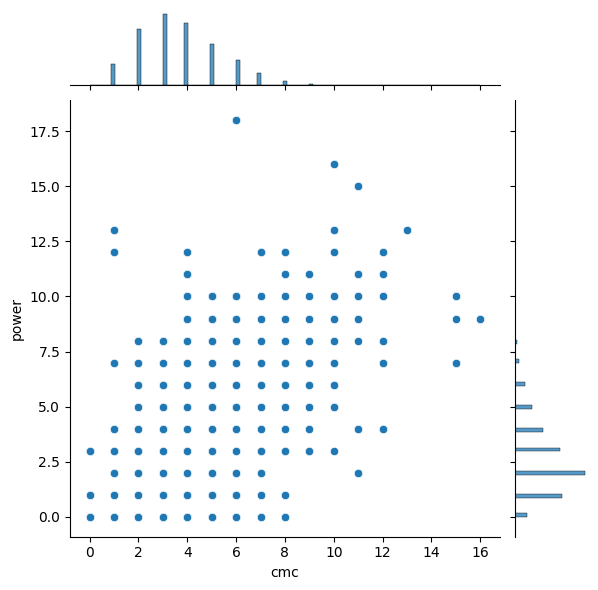

In [10]:
sns.jointplot(data=mtg_numeric, x='cmc', y='power')

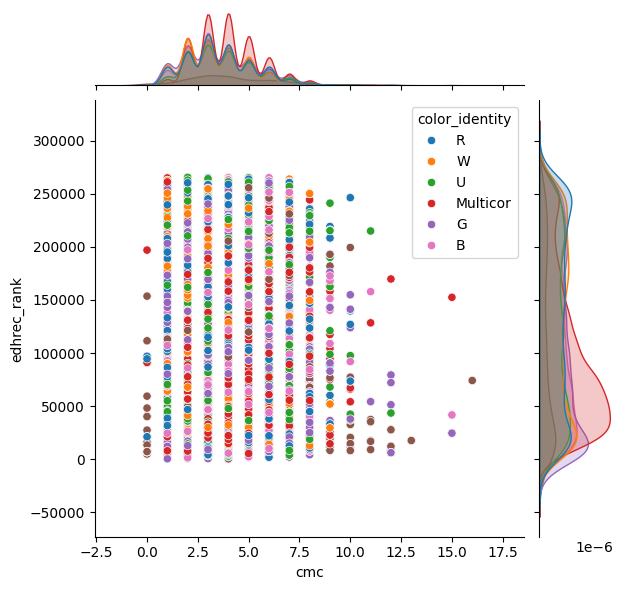

In [11]:
sns.jointplot(
  data=mtg_numeric,
  x='cmc',
  y='edhrec_rank',
  hue='color_identity'
)

plt.show()

## EDHREC_RANK
_O que eleva o rankeamento de uma carta?_

Como pode-se perceber pelos gráficos acima, o que leva uma carta a ser melhor ou pior rankeada no site não parece ser diretamente só uma de suas variáveis. Não é só tendo um custo menor, ou mais _power_ ou _toughness_ que torna uma carta melhor.

Além disso, é importante ressaltar que para essas análises, a limpeza de dados para extração de variáveis puramente numéricas acabou excluindo alguns tipos de carta do dataset.

Para um próximo momento, vale a provocação:

_Como encontrar o fator que faz com que a carta seja melhor rankeada? É possível ter uma percepção puramente numérica disso?_